In [1]:
import pandas as pd
import os
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl
from fiona.io import ZipMemoryFile
import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
valid_files = [
    os.path.join("../data/address", file)
    for file in os.listdir("../data/address")
    if file.split(".")[-1] == "xz"
]

total_dots_df = []

for county_file in tqdm(sorted(valid_files)):
    county_shape_df = pd.read_csv(county_file)
    county_shape_df.crs = "epsg:4326"
    total_dots_df.append(county_shape_df)

total_dots_df = pd.concat(total_dots_df)
print(total_dots_df)

100%|████████████████████████████████████████████████████████████| 3221/3221 [01:49<00:00, 29.44it/s]


                                               address          GEOID20  \
0         609 upper kingston rd, prattville, al, 36067   10010201001000   
1         704 lower kingston rd, prattville, al, 36067   10010201001001   
2               797 franklin st, prattville, al, 36067   10010201001002   
3    Eds Drive, Pate, Prattville, Autauga County, A...   10010201001003   
4    West 4th Street, Autauga County, Alabama, 3606...   10010201001004   
..                                                 ...              ...   
592                                                NaN  721537504001005   
593                                                NaN  721537504004036   
594                                                NaN  721537501022020   
595                                                NaN  721537505012011   
596                                                NaN  721537504003006   

     longitude   latitude                                       geometry  
0   -86.478895  32.47265

# Merge the geometries, so that each county has at least one value?

In [4]:
total_dots_df
gdf = gpd.GeoDataFrame(
    total_dots_df, geometry=gpd.points_from_xy(total_dots_df.longitude, total_dots_df.latitude), crs="EPSG:4326"
)
gdf

,address,GEOID20,longitude,latitude,geometry
0,"609 upper kingston rd, prattville, al, 36067",10010201001000,-86.478895,32.472650,POINT (-86.47889 32.47265)
1,"704 lower kingston rd, prattville, al, 36067",10010201001001,-86.486426,32.470188,POINT (-86.48643 32.47019)
2,"797 franklin st, prattville, al, 36067",10010201001002,-86.489222,32.471780,POINT (-86.48922 32.47178)
3,"Eds Drive, Pate, Prattville, Autauga County, A...",10010201001003,-86.498890,32.471974,POINT (-86.49889 32.47197)
4,"West 4th Street, Autauga County, Alabama, 3606...",10010201001004,-86.499584,32.467318,POINT (-86.49958 32.46732)
...,...,...,...,...,...
592,NaN,721537504001005,NaN,NaN,POINT EMPTY
593,NaN,721537504004036,NaN,NaN,POINT EMPTY
594,NaN,721537501022020,NaN,NaN,POINT EMPTY
595,NaN,721537505012011,NaN,NaN,POINT EMPTY


In [5]:
gdf['covered'] = gdf['address'].apply(lambda x: x != np.nan)
gdf

,address,GEOID20,longitude,latitude,geometry,covered
0,"609 upper kingston rd, prattville, al, 36067",10010201001000,-86.478895,32.472650,POINT (-86.47889 32.47265),True
1,"704 lower kingston rd, prattville, al, 36067",10010201001001,-86.486426,32.470188,POINT (-86.48643 32.47019),True
2,"797 franklin st, prattville, al, 36067",10010201001002,-86.489222,32.471780,POINT (-86.48922 32.47178),True
3,"Eds Drive, Pate, Prattville, Autauga County, A...",10010201001003,-86.498890,32.471974,POINT (-86.49889 32.47197),True
4,"West 4th Street, Autauga County, Alabama, 3606...",10010201001004,-86.499584,32.467318,POINT (-86.49958 32.46732),True
...,...,...,...,...,...,...
592,NaN,721537504001005,NaN,NaN,POINT EMPTY,True
593,NaN,721537504004036,NaN,NaN,POINT EMPTY,True
594,NaN,721537501022020,NaN,NaN,POINT EMPTY,True
595,NaN,721537505012011,NaN,NaN,POINT EMPTY,True


In [6]:
# import matplotlib.colors as clrs
# cmap = clrs.ListedColormap(['red', 'green'])

In [7]:
from matplotlib.pyplot import figure

In [8]:
fdf = gdf.drop_duplicates(subset='GEOID20', keep="last")
fdf

,address,GEOID20,longitude,latitude,geometry,covered
0,"609 upper kingston rd, prattville, al, 36067",10010201001000,-86.478895,32.472650,POINT (-86.47889 32.47265),True
1,"704 lower kingston rd, prattville, al, 36067",10010201001001,-86.486426,32.470188,POINT (-86.48643 32.47019),True
2,"797 franklin st, prattville, al, 36067",10010201001002,-86.489222,32.471780,POINT (-86.48922 32.47178),True
3,"Eds Drive, Pate, Prattville, Autauga County, A...",10010201001003,-86.498890,32.471974,POINT (-86.49889 32.47197),True
4,"West 4th Street, Autauga County, Alabama, 3606...",10010201001004,-86.499584,32.467318,POINT (-86.49958 32.46732),True
...,...,...,...,...,...,...
592,NaN,721537504001005,NaN,NaN,POINT EMPTY,True
593,NaN,721537504004036,NaN,NaN,POINT EMPTY,True
594,NaN,721537501022020,NaN,NaN,POINT EMPTY,True
595,NaN,721537505012011,NaN,NaN,POINT EMPTY,True


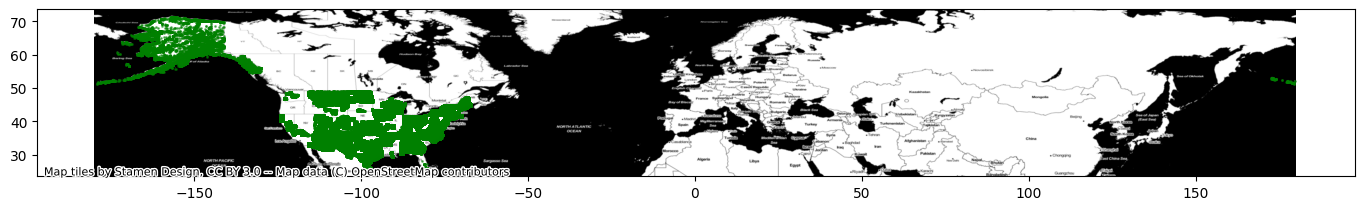

In [9]:
fdf.to_crs("EPSG:4326")
ax = fdf.plot(markersize=1, color='green', alpha=0.5)
ctx.add_basemap(ax, crs=fdf.crs.to_string(), source=ctx.providers.Stamen.Toner)
# ax.set_xlim([-130, -60])
# ax.set_ylim([20, 55])
# plt.title('Address')
fig =plt.gcf()
fig.set_size_inches(17,11)
plt.savefig('../docs/us_addresses.png', dpi=100)